# Compilacion de metnum.cpp

In [26]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: cannot create directory ‘build’: File exists
-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /home/leandro/Downloads/MetodosNumericos/MetodosTp2/metnum-tp2-2c2020/virtualEnvTp2/bin/python (found version "3.6.9") 
-- Found PythonLibs: /usr/lib/x86_64-linux-gnu/libpython3.6m.so
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/home/leandro

In [27]:
# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version
import metnum

/home/leandro/Downloads/MetodosNumericos/MetodosTp2FinalVer/MetNum/tp2/notebooks
Python 3.6.9


## Explorando los datos

In [49]:
%load_ext autoreload
%autoreload 2
import pandas as pd

df_train = pd.read_csv("../data/train.csv")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Es un csv, con columnas por cada pixel

In [50]:
df_train[:10]

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Reducir el dataset
Ya que el dataset es grande, me quedo con una porción de éste

**<font color=red>ESTO ES SOLO PARA HACER PRUEBAS. CUANDO REPORTEN LOS RESULTADOS, USAR DATASET COMPLETO

In [51]:
df_train = df_train[:3000]

En el primer caracter está el dígito a reconocer. Llamamos a esto y_train

In [52]:
# Uso values para mandar todo a arrays de numpy
X = df_train[df_train.columns[1:]].values
y = df_train["label"].values.reshape(-1, 1)

X.shape, y.shape

((3000, 784), (3000, 1))

Convierto el resto a matrices de 28 x 28

A ver cómo se ven...

Supuestamente es un 7


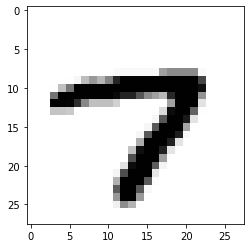

In [53]:
import matplotlib.pyplot as plt

num = 1917

print(f"Supuestamente es un {int(y[num])}")

img = X[num].reshape(28, 28)
plt.imshow(img, cmap="Greys")

### Balance de clases

¿Tenemos la misma cantidad de cada número?

In [54]:
df_train["label"].value_counts(normalize=True)

1    0.114000
2    0.109000
6    0.102333
7    0.100667
0    0.099667
4    0.098333
9    0.096667
5    0.096000
8    0.093333
3    0.090000
Name: label, dtype: float64

No: tenemos más 1 que 5, pero tampoco está tan desbalanceado

### Conjunto de development

In [55]:
limit = int(0.8 * X.shape[0]) 

X_train, y_train = X[:limit], y[:limit]
X_val, y_val = X[limit:], y[limit:]

assert len(X_train) == len(y_train)
assert len(X_val) == len(y_val)

print(f"Ahora tengo {len(X_train)} instancias de entrenamiento y {len(X_val)} de validación")

Ahora tengo 2400 instancias de entrenamiento y 600 de validación


In [56]:
from sklearn.neighbors import KNeighborsClassifier

# Acá pueden cambiar el clasificador nuestro por el de sklearn!

clf = metnum.KNNClassifier(100)
#clf = KNeighborsClassifier(100)

clf.fit(X_train, y_train)

In [57]:
%%time
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_val)

acc = accuracy_score(y_val, y_pred)
print("Accuracy: {}".format(acc))

Accuracy: 0.795
CPU times: user 3.31 s, sys: 13.1 ms, total: 3.32 s
Wall time: 3.29 s


# Análisis de k para kNN

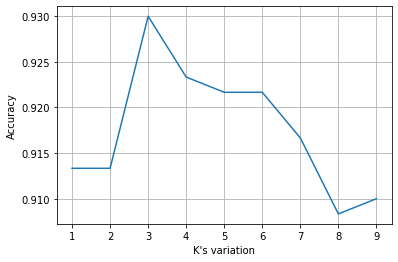

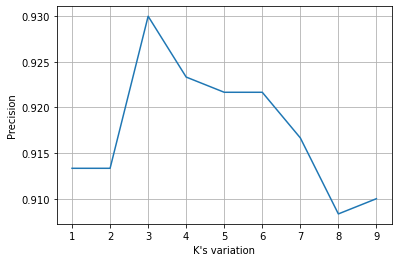

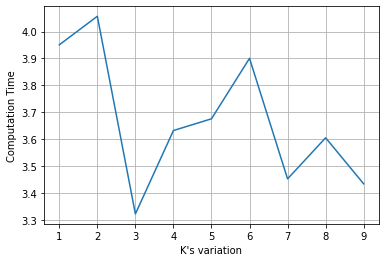

CPU times: user 33.7 s, sys: 59.2 ms, total: 33.8 s
Wall time: 33.7 s


In [58]:
%%time
from sklearn.metrics import accuracy_score, precision_score
from time import time
import numpy as np

total_accuracies = []
total_precisions = []
total_knnTimes = []

# Los k que voy a probar están entre 0 y 49
k_list = np.arange(1,10)

for k in k_list:
    # Tomo el tiempo antes de iniciar la ejecución del algoritmo knn
    knnTime_start = time()
    
    # Ejecuto el algoritmo de metnum.cpp
    metNumClassifier = metnum.KNNClassifier(k)
    metNumClassifier.fit(X_train, y_train)
    y_pred = metNumClassifier.predict(X_val)
    
    # Tomo el tiempo al finalizar la ejecución del algoritmo y voy guardando los resultados
    knnTime_end = time()
    knnTime = knnTime_end - knnTime_start
    
    # Uso las metricas de sklearn para calcular el accuracy y la precisión
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='micro')
    
    # Voy guardando los resultados parciales en las listas correspondientes
    total_knnTimes.append(knnTime)
    total_accuracies.append(accuracy)
    total_precisions.append(precision)
    
total_knnTimes = np.asarray(total_knnTimes)
total_accuracies = np.asarray(total_accuracies)
total_precisions = np.asarray(total_precisions)

mean_knnTimes = np.mean(total_knnTimes)
mean_accuracies = np.mean(total_accuracies)
mean_precisions = np.mean(total_precisions)

std_deviation_knnTimes = np.std(total_knnTimes)
std_deviation_accuracies = np.std(total_accuracies)
std_deviation_precisions = np.std(total_precisions)

plt.figure("Accuracies by k variation")
plt.plot(k_list, total_accuracies)
plt.grid()
plt.xlabel("K's variation")
plt.ylabel("Accuracy")
plt.savefig("ExperimentResults/FinalAccuracies_variation_by_k_10-20.png")
plt.show()

plt.figure("Precisions by k variation")
plt.plot(k_list, total_precisions)
plt.grid()
plt.xlabel("K's variation")
plt.ylabel("Precision")
plt.savefig("ExperimentResults/FinalPrecisions_variation_by_k_10-20.png")
plt.show()

plt.figure("Computation time by k variation")
plt.plot(k_list, total_knnTimes)
plt.grid()
plt.xlabel("K's variation")
plt.ylabel("Computation Time")
plt.savefig("ExperimentResults/FinalComputeTime_variation_by_k_10-20.png")
plt.show()

# Análisis de alpha para PCA y KNN

Para el análisis del alpha, vamos a utilizar el valor de k=10 para Knn, porque en el item anterior determinamos
que se trata de la cantidad de vecinos óptima resultante de la comparación con las métricas utilizadas.

Accuracy is : 
0.08833333333333333
Precision is : 
0.08833333333333333
Accuracy is : 
0.08833333333333333
Precision is : 
0.08833333333333333
Accuracy is : 
0.08833333333333333
Precision is : 
0.08833333333333333
Accuracy is : 
0.08833333333333333
Precision is : 
0.08833333333333333
Accuracy is : 
0.08833333333333333
Precision is : 
0.08833333333333333
Accuracy is : 
0.08833333333333333
Precision is : 
0.08833333333333333
Accuracy is : 
0.08833333333333333
Precision is : 
0.08833333333333333
Accuracy is : 
0.08833333333333333
Precision is : 
0.08833333333333333
Accuracy is : 
0.08833333333333333
Precision is : 
0.08833333333333333
Accuracy is : 
0.08833333333333333
Precision is : 
0.08833333333333333
Accuracy is : 
0.08833333333333333
Precision is : 
0.08833333333333333
Accuracy is : 
0.08833333333333333
Precision is : 
0.08833333333333333
Accuracy is : 
0.08833333333333333
Precision is : 
0.08833333333333333
Accuracy is : 
0.08833333333333333
Precision is : 
0.08833333333333333
Accura

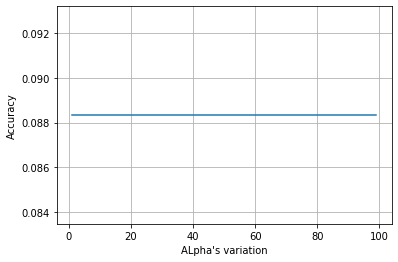

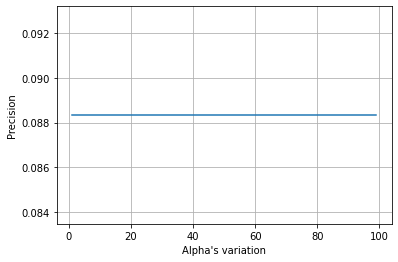

ValueError: x and y must have same first dimension, but have shapes (99,) and (9,)

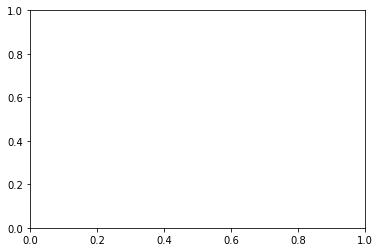

In [67]:
%%time

from sklearn.metrics import accuracy_score, precision_score
from time import time
import numpy as np

# Los alpha que voy a probar están entre 0 y 49
alpha_list = np.arange(1,100)

total_accuracies = []
total_precisions = []
total_pcaTimes = []

for alpha in alpha_list:
    
    # Tomo el tiempo antes de iniciar la ejecución del algoritmo pca
    pcaTime_start = time()
    
    # Ejecuto el algoritmo de pca de metnum.cpp
    # Transformo las instancias de entrenamiento
    pca = metnum.PCA(int(alpha))
    pca.fit(X_train)
    X_train_transformed = pca.transform(X_train)
    # Transformo las instancias de validacion
    X_val_transformed = pca.transform(X_val)
    
    # Ejecuto el algoritmo de knn de metnum.cpp, teniendo en cuenta que uso los datos transformados, y k=10
    metNumClassifier = metnum.KNNClassifier(10)
    metNumClassifier.fit(X_train_transformed, y_train)
    y_pred = metNumClassifier.predict(X_val_transformed)
    
    # Tomo el tiempo al finalizar la ejecucion del algoritmo pca + knn
    pcaTime_end = time()
    pcaTime = pcaTime_end - pcaTime_start
    
    # Uso las metricas de sklearn para calcular el accuracy y la precisión
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='micro')
    
    print("Accuracy is : ")
    print(accuracy)
    
    print("Precision is : ")
    print(precision)
    
    # Voy guardando los resultados parciales en las listas correspondientes
    total_pcaTimes.append(pcaTime)
    total_accuracies.append(accuracy)
    total_precisions.append(precision)

total_pcaTimes = np.asarray(total_pcaTimes)
total_accuracies = np.asarray(total_accuracies)
total_precisions = np.asarray(total_precisions)

mean_pcaTimes = np.mean(total_pcaTimes)
mean_accuracies = np.mean(total_accuracies)
mean_precisions = np.mean(total_precisions)

std_deviation_pcaTimes = np.std(total_pcaTimes)
std_deviation_accuracies = np.std(total_accuracies)
std_deviation_precisions = np.std(total_precisions)
    
plt.figure("Accuracies by alpha variation")
plt.plot(alpha_list, total_accuracies)
plt.grid()
plt.xlabel("ALpha's variation")
plt.ylabel("Accuracy")
plt.savefig("ExperimentResults/Accuracies_variation_by_alpha_1-10.png")
plt.show()

plt.figure("Precisions by alpha variation")
plt.plot(alpha_list, total_precisions)
plt.grid()
plt.xlabel("Alpha's variation")
plt.ylabel("Precision")
plt.savefig("ExperimentResults/Precisions_variation_by_alpha_1-10.png")
plt.show()

plt.figure("Computation time by alpha variation")
plt.plot(alpha_list, total_knnTimes)
plt.grid()
plt.xlabel("Alpha's variation")
plt.ylabel("Computation Time")
plt.savefig("ExperimentResults/ComputeTime_variation_by_alpha_1-10.png")
plt.show()